# Comparing Two Groups

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

import statsmodels.stats as stats

import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import CompareMeans

## Categorical Response: Comparing Two Proportions

### 10.10 Comparing marketing commercials 

In [5]:
n = 100
commercialA = 25
commercialB = 20

**Assumptions**
* Independent random samples.
* At least 5 successes and 5 failures in each group.

$H_0:$ $p_1 - p_2 = 0$; $\quad H_a:$ $p_1 - p_2 \ne 0$

In [10]:
ztest, pval = proportions_ztest([commercialA, commercialB], [n, n])
print('z:\t', ztest)
print('pval:\t', pval)

z:	 0.8466675133346031
pval:	 0.3971804712199202


Conclusion: there is no evidence to conclude that there is statistically significant difference between the groups.

### 10.11 Hormone therapy for menopause

In [11]:
n_therapy = 8506
p_therapy = 107
n_placebo = 8102
p_placebo = 88

Is this a significant difference?

**Assumptions**
* Independent random samples.
* At least 5 successes and 5 failures in each group.

$H_0:$ $p_1 - p_2 = 0$;$\quad H_a:$ $p_1 - p_2 \ne 0$

In [15]:
ztest, pval = proportions_ztest([p_placebo, p_therapy], [n_placebo, n_therapy])
print('p1:\t', round(p_placebo / n_placebo, 3)) 
print('p2:\t', round(p_therapy / n_therapy, 3))
print('z:\t', round(ztest, 3))
print('pval:\t', round(pval, 3))

p1:	 0.011
p2:	 0.013
z:	 -1.027
pval:	 0.304


## Comparing two means

### 10.28 Student survey

Number of times reading the newspapper

In [16]:
females = [5, 3, 6, 3, 7, 1, 1, 3, 0, 4, 7, 2, 2, 7, 3, 0, 5, 0, 4, 4, 5, 14, 3, 1, 2, 1, 7, 2, 5, 3, 7]
males = [0, 3, 7, 4, 3, 2, 1, 12, 1, 6, 2, 2, 7, 7, 5, 3, 14, 3, 7, 6, 5, 5, 2, 3, 5, 5, 2, 3, 3]

In [33]:
d_females = DescrStatsW(females, ddof=1)
d_males = DescrStatsW(males, ddof=1)

[Text(0, 0, 'females'), Text(0, 0, 'males')]

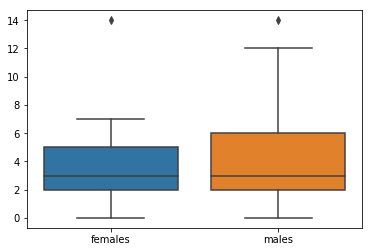

In [21]:
ax = sns.boxplot(data=[females, males])
ax.set_xticklabels(['females', 'males'])

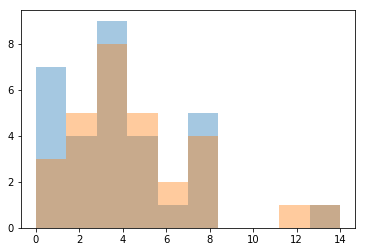

In [24]:
sns.distplot(females, kde=False, bins=10)
sns.distplot(males, kde=False, bins=10)

Both groups distributions are skewed to the right.

In [34]:
cm = CompareMeans(d_females, d_males)

**Confidence Interval for the difference between two population means**

Assumptions:
* If $n_1 < 30$ or $n_2 < 30$ then we cannot rely on the central limit theorem. We make the assumption that the population distributions are normal. 
* Independent random samples from the two groups.
* The method is robust to violations of the normality assumption.

Degrees of freedom $df$
* If $s_1 = s_2$ and $n_1 = n_2$ then $df = n_1 + n_2 - 2$.
* Else *Welch-Satterthwaite formula*.

In [39]:
print('n1, n2:\t', d_females.nobs, d_males.nobs)
print('s1, s2:\t', d_females.std, d_males.std)

n1, n2:	 31.0 29.0
s1, s2:	 2.9292738283216755 3.099737792819975


In [44]:
print('CI:', cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal'))

CI: (-2.20109066917513, 0.9218915590527725)


The 95% CI contains 0 - we can not conclude that there is a difference between groups.

**Two-sided significance test for comparing two population means**

Assumptions:
* Independent random samples.
* Approximately normal population distribution for each group.
    * Mainly important for small sample sizes.
    * Two-sided test is robust to violations of this assumption.

Hypothesis:

$H_0:$ $\mu_1 = \mu_2$; $\quad H_a:$ $\mu_1 \ne \mu_2$

**Test statistic**

In [48]:
from scipy.stats import ttest_ind

In [46]:
tstat, pvalue, df = cm.ttest_ind(usevar='unequal')
print('t:\t', round(tstat, 3))
print('pval:\t', round(pval, 3))

t:	 -0.82
pval:	 0.304


In [49]:
tstat, pvalue = ttest_ind(females, males, equal_var=False)
print('t:\t', round(tstat, 3))
print('pval:\t', round(pval, 3))

t:	 -0.82
pval:	 0.304


In [47]:
cm.summary(usevar='unequal')

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.6396,0.780,-0.820,0.416,-2.201,0.922
